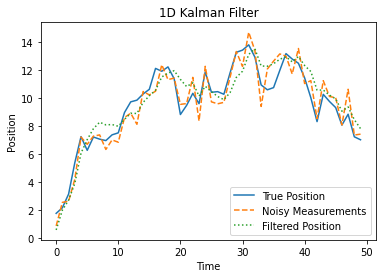

In [1]:
import numpy as np

# Simulated data: true state
np.random.seed(0)
timesteps = 50
true_position = np.cumsum(np.random.normal(0, 1, timesteps))
true_velocity = np.diff(true_position, prepend=0)

# Noisy measurements of position
measurement_noise = 1.0
noisy_position = true_position + np.random.normal(0, measurement_noise, timesteps)

# Kalman filter parameters
initial_state = np.array([0, 0])  # Initial state: [position, velocity]
state_transition_matrix = np.array([[1, 1], [0, 1]])
control_input_matrix = np.zeros((2, 1))
process_noise_covariance = np.diag([0.01, 0.01])
measurement_matrix = np.array([[1, 0]])
measurement_noise_covariance = np.array([[measurement_noise ** 2]])

# Kalman filter initialization
state_estimate = initial_state
state_estimate_covariance = np.diag([1, 1])

# Perform Kalman filtering
filtered_position = np.zeros(timesteps)
filtered_velocity = np.zeros(timesteps)

for t in range(timesteps):
    # Prediction step
    state_estimate = state_transition_matrix @ state_estimate
    state_estimate_covariance = state_transition_matrix @ state_estimate_covariance @ state_transition_matrix.T + process_noise_covariance

    # Update step
    innovation = noisy_position[t] - measurement_matrix @ state_estimate
    innovation_covariance = measurement_matrix @ state_estimate_covariance @ measurement_matrix.T + measurement_noise_covariance
    kalman_gain = state_estimate_covariance @ measurement_matrix.T @ np.linalg.inv(innovation_covariance)
    state_estimate = state_estimate + kalman_gain @ innovation
    state_estimate_covariance = (np.eye(2) - kalman_gain @ measurement_matrix) @ state_estimate_covariance

    filtered_position[t] = state_estimate[0]
    filtered_velocity[t] = state_estimate[1]

# Plot the results
import matplotlib.pyplot as plt

plt.figure()
plt.plot(true_position, label="True Position")
plt.plot(noisy_position, linestyle="dashed", label="Noisy Measurements")
plt.plot(filtered_position, linestyle="dotted", label="Filtered Position")
plt.legend()
plt.title("1D Kalman Filter")
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()


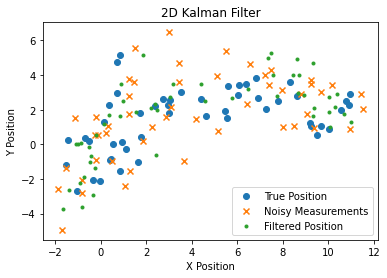

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate true state: position and velocity in 2D
np.random.seed(0)
timesteps = 50
true_position = np.cumsum(np.random.normal(0, 1, (timesteps, 2)), axis=0)
true_velocity = np.vstack((np.zeros((1, 2)), np.diff(true_position, axis=0)))

# Noisy position measurements
measurement_noise = 1.0
noisy_position = true_position + np.random.normal(0, measurement_noise, (timesteps, 2))

# Kalman filter parameters
initial_state = np.array([0, 0, 0, 0])  # Initial state: [x_position, x_velocity, y_position, y_velocity]
state_transition_matrix = np.array([[1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 1]])
control_input_matrix = np.zeros((4, 1))
process_noise_covariance = np.diag([0.01, 0.01, 0.01, 0.01])
measurement_matrix = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])
measurement_noise_covariance = np.array([[measurement_noise**2, 0], [0, measurement_noise**2]])

# Kalman filter initialization
state_estimate = initial_state
state_estimate_covariance = np.diag([1, 1, 1, 1])

# Perform Kalman filtering
filtered_position = np.zeros((timesteps, 2))
filtered_velocity = np.zeros((timesteps, 2))

for t in range(timesteps):
    # Prediction step
    state_estimate = state_transition_matrix @ state_estimate
    state_estimate_covariance = state_transition_matrix @ state_estimate_covariance @ state_transition_matrix.T + process_noise_covariance

    # Update step
    innovation = noisy_position[t] - measurement_matrix @ state_estimate
    innovation_covariance = measurement_matrix @ state_estimate_covariance @ measurement_matrix.T + measurement_noise_covariance
    kalman_gain = state_estimate_covariance @ measurement_matrix.T @ np.linalg.inv(innovation_covariance)
    state_estimate = state_estimate + kalman_gain @ innovation
    state_estimate_covariance = (np.eye(4) - kalman_gain @ measurement_matrix) @ state_estimate_covariance

    filtered_position[t] = state_estimate[[0, 2]]
    filtered_velocity[t] = state_estimate[[1, 3]]

# Plot the results
plt.figure()
plt.scatter(true_position[:, 0], true_position[:, 1], label="True Position", marker="o")
plt.scatter(noisy_position[:, 0], noisy_position[:, 1], label="Noisy Measurements", marker="x")
plt.scatter(filtered_position[:, 0], filtered_position[:, 1], label="Filtered Position", marker=".")
plt.legend()
plt.title("2D Kalman Filter")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()


In [3]:
import numpy as np

# Define the system and measurement models
state_transition = np.eye(4)
measurement_model = np.array([[1, 0, 0, 0],
                              [0, 1, 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 1]])

# Set the initial state estimate and covariance matrix
x_hat = np.zeros((4, 1))
P = np.eye(4)

# Set the process noise and measurement noise covariances
Q = 0.01 * np.eye(4)
R = 1.0

# Set the true state and noisy measurements
np.random.seed(0)
timesteps = 100
true_state = np.random.normal(0, 1, (timesteps, 4))
measurements = true_state[:, 0] + np.random.normal(0, np.sqrt(R), timesteps)

# Run the Kalman filter
estimated_state = np.zeros((timesteps, 4))
for t in range(timesteps):
    # Prediction step
    x_hat_minus = state_transition @ x_hat
    P_minus = state_transition @ P @ state_transition.T + Q

    # Update step
    K = P_minus @ measurement_model.T @ np.linalg.inv(measurement_model @ P_minus @ measurement_model.T + R)
    x_hat = x_hat_minus + K @ (measurements[t] - measurement_model @ x_hat_minus)
    P = (np.eye(4) - K @ measurement_model) @ P_minus

    estimated_state[t] = x_hat.flatten()

# Extract the estimated weights from the estimated state
estimated_weights = estimated_state[:, 1:]

# Print the estimated weights
print("Estimated weights:")
print(estimated_weights[-1])


Estimated weights:
[0.09176884 0.09176884 0.09176884]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the time series data
data = np.genfromtxt('data.csv', delimiter=',')
timesteps = len(data)

# Set the measurement matrix
measurement_matrix = np.array([[1, 0]])

# Set the process noise and measurement noise covariances
Q = 0.01 * np.eye(2)
R = 1.0

# Set the initial state estimate and covariance matrix
x_hat = np.zeros((2, 1))
P = np.eye(2)

# Run the Kalman filter
estimated_state = np.zeros((timesteps, 2))
for t in range(timesteps):
    # Prediction step
    x_hat_minus = x_hat
    P_minus = P + Q

    # Update step
    K = P_minus @ measurement_matrix.T @ np.linalg.inv(measurement_matrix @ P_minus @ measurement_matrix.T + R)
    x_hat = x_hat_minus + K @ (data[t] - measurement_matrix @ x_hat_minus)
    P = (np.eye(2) - K @ measurement_matrix) @ P_minus

    estimated_state[t] = x_hat.flatten()

# Plot the results
plt.plot(data, label='True Values')
plt.plot(estimated_state[:, 0], label='Estimated Trend')
plt.legend()
plt.title('Kalman Filter for Trend Estimation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


ValueError: could not broadcast input array from shape (12,) into shape (2,)

In [13]:
import numpy as np

# Set the number of samples and the number of features
n_samples = 1000
n_features = 4

# Set the true values of the weights
true_weights = np.array([0.5, -1.0, 2.0, -0.5, 1.0])

# Generate the input data
X = np.random.randn(n_samples, n_features)
X = np.hstack((np.ones((n_samples, 1)), X))  # Add a column of ones for the bias term

# Generate the output data
y = X @ true_weights + np.random.randn(n_samples)

# Save the data to a CSV file
data = np.hstack((X, y.reshape(-1, 1)))
np.savetxt('data.csv', data, delimiter=',')


In [14]:
import numpy as np

# Set the number of samples and the number of features
n_samples = 1000
n_features = 4

# Set the true values of the weights
true_weights = np.array([0.5, -1.0, 2.0, -0.5, 1.0])

# Generate the input data
X = np.random.randn(n_samples, n_features)
X = np.hstack((np.ones((n_samples, 1)), X))  # Add a column of ones for the bias term

# Generate the output data
y = X @ true_weights + np.random.randn(n_samples)

# Save the data to a CSV file
data = np.hstack((X, y.reshape(-1, 1)))
np.savetxt('data.csv', data, delimiter=',')


import numpy as np

# Set the number of samples and the number of features
n_samples = 1000
n_features = 4

# Set the true values of the weights
true_weights = np.array([0.5, -1.0, 2.0, -0.5, 1.0])

# Generate the input data
X = np.random.randn(n_samples, n_features)
X = np.hstack((np.ones((n_samples, 1)), X))  # Add a column of ones for the bias term

# Generate the output data
y = X @ true_weights + np.random.randn(n_samples)

# Select a subset of the data for training
train_size = 800
train_indices = np.random.choice(n_samples, train_size, replace=False)
train_data = np.hstack((X[train_indices], y[train_indices].reshape(-1, 1)))

# Save the training data to a CSV file
np.savetxt('train_data.csv', train_data, delimiter=',')


In [21]:
import numpy as np

# Set the number of samples and the number of features
n_samples = 1000
n_features = 4

# Set the true values of the weights
true_weights = np.array([0.5, -1.0, 2.0, -0.5, 1.0])

# Generate the input data
X = np.random.randn(n_samples, n_features)
X = np.hstack((np.ones((n_samples, 1)), X))  # Add a column of ones for the bias term

# Generate the output data
y = X @ true_weights + np.random.randn(n_samples)

# Select a subset of the data for training
train_size = 800
train_indices = np.random.choice(n_samples, train_size, replace=False)
train_data = np.hstack((X[train_indices], y[train_indices].reshape(-1, 1)))

# Save the training data to a CSV file
np.savetxt('test_data.csv', train_data, delimiter=',')


In [22]:
import numpy as np

# Set the initial prior distribution for the weights
prior_mean = np.zeros((5, 1))
prior_covariance = np.eye(5)

# Set the process noise and measurement noise covariances
Q = 0.01 * np.eye(5)
R = 1.0

# Set the initial estimate for the weights
x_hat = prior_mean
P = prior_covariance

# Set the training data
train_data = np.genfromtxt('train_data.csv', delimiter=',')

# Update the weights using the Bayesian Rule
for i in range(train_data.shape[0]):
    x = np.reshape(train_data[i, :-1], (5, 1))
    y = train_data[i, -1]

    # Prediction step
    x_hat_minus = x_hat
    P_minus = P + Q

    # Update step
    K = P_minus @ x / (x.T @ P_minus @ x + R)
    x_hat = x_hat_minus + K * (y - x.T @ x_hat_minus)
    P = (np.eye(5) - K @ x.T) @ P_minus

# Predict the output using the updated weights
test_data = np.genfromtxt('test_data.csv', delimiter=',')
predicted_output = np.zeros((test_data.shape[0], 1))
for i in range(test_data.shape[0]):
    x = np.reshape(test_data[i, :-1], (5, 1))
    predicted_output[i] = x.T @ x_hat

# Print the predicted output
print(predicted_output)


[[-2.48404292e+00]
 [-3.40169752e+00]
 [ 9.71664794e-01]
 [-3.13453508e-01]
 [-1.39893126e+00]
 [-3.76224921e+00]
 [ 5.38573144e-01]
 [-1.83051217e+00]
 [-2.65931021e+00]
 [ 6.52247480e+00]
 [-4.65336692e-01]
 [-3.49407307e+00]
 [ 1.01110069e+00]
 [ 6.06790894e-01]
 [-1.51513374e+00]
 [ 2.13877387e+00]
 [-3.92994768e+00]
 [-2.12140146e+00]
 [-1.36170954e+00]
 [-4.12030173e+00]
 [ 3.27015792e+00]
 [ 5.84959821e+00]
 [-1.36138371e+00]
 [ 1.34701625e+00]
 [-6.65982664e-01]
 [-2.08635095e-02]
 [-4.92581459e+00]
 [-1.32611686e+00]
 [ 2.01860532e-01]
 [ 1.99398725e+00]
 [ 9.16579482e-01]
 [ 8.13700877e-01]
 [-3.23798625e+00]
 [ 1.43939667e+00]
 [ 2.19112807e+00]
 [ 1.59765902e-01]
 [ 7.59835313e-01]
 [ 4.19302432e+00]
 [-5.17090664e+00]
 [ 1.21711910e+00]
 [ 7.22144663e-01]
 [ 2.57600051e+00]
 [-1.45925948e+00]
 [ 2.11220216e-01]
 [-3.80043139e+00]
 [ 3.74994492e+00]
 [ 2.72015347e+00]
 [-1.20666049e+00]
 [ 2.29762759e+00]
 [-7.66083142e-03]
 [ 3.96401970e+00]
 [ 1.43673008e+00]
 [ 1.9883312

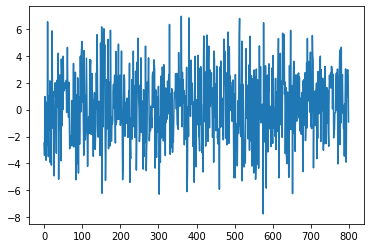

In [27]:
plt.plot(predicted_output)